In [1]:
# Get the closing price for every data, calculate the residual return using the formula
# Simulate a signed simularity matrix
# Do the embedding work and put it in the formula using SPONGE

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path


In [3]:
# Initialize workflow parameters
num_top = 50
data_path = Path(f'../data/top_{num_top}_companies_by_sector.csv').resolve()
analysis_start = "2024-01-01"
analysis_end = "2024-12-31"

In [4]:
data = pd.read_csv(data_path)
data

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap (B),Country,IPO Year,Volume,Sector,Industry
0,UFPI,UFP Industries Inc. Common Stock,$115.67,-0.7900,-0.678%,7.024022,United States,1993.0,223820,Basic Materials,Forest Products
1,AMWD,American Woodmark Corporation Common Stock,$77.01,0.4800,0.627%,1.159322,United States,1986.0,168642,Basic Materials,Forest Products
2,IPX,IperionX Limited American Depositary Share,$26.52,0.1200,0.455%,0.682213,United States,NaN,50560,Basic Materials,Other Metals and Minerals
3,EU,enCore Energy Corp. Common Shares,$2.91,0.0600,2.105%,0.541518,United States,NaN,1091464,Basic Materials,Other Metals and Minerals
4,USGO,U.S. GoldMining Inc. Common stock,$12.59,1.7800,16.466%,0.156678,United States,2023.0,225247,Basic Materials,Precious Metals
...,...,...,...,...,...,...,...,...,...,...,...
524,VIVK,Vivakor Inc. Common Stock,$0.845,-0.0248,-2.851%,0.028424,United States,NaN,42549,Utilities,Environmental Services
525,SONM,Sonim Technologies Inc. Common Stock,$2.55,-0.0800,-3.042%,0.012423,United States,2019.0,15396,Utilities,Telecommunications Equipment
526,CLRO,ClearOne Inc. (DE) Common Stock,$0.4926,-0.0072,-1.441%,0.011807,United States,NaN,87213,Utilities,Telecommunications Equipment
527,SUNE,SUNation Energy Inc. Common Stock,$1.225,-0.0950,-7.197%,0.002223,United States,NaN,87057,Utilities,Telecommunications Equipment


In [ ]:
ticker = data['Symbol'].to_list()
market_ticker = '^GSPC'
ticker.append(market_ticker)
ticker
sector_map = {}
for row in data:
    if
sector_map


ValueError: too many values to unpack (expected 2)

In [ ]:
# calculate the rate of return
# align data in the dataframe as well as putting it in a matrix
# run CAPM regression
# compute residual returns
# use SPONGE clustering
# convert this into plotly
stock_price = yf.download(tickers=ticker, start = analysis_start, end = analysis_end)['Close']
stock_price

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  530 of 530 completed

23 Failed downloads:
['AMODW', 'RMCOW', 'SLDPW', 'NIOBW', 'ZEOWW', 'NXPLW', 'NESRW', 'ANNAW', 'HYMCW', 'ADNWW', 'FOXXW', 'NEHCW', 'DHCNL', 'NEOVW', 'MVSTW', 'USGOW', 'DFLIW', 'ARKOW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-31)')
['INFN', 'QRTEP']: HTTPError('HTTP Error 404: ')
['ROIC']: YFTzMissingError('possibly delisted; no timezone found')
['STRK', 'SFD']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-01-01 -> 2024-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1704085200, endDate = 1735621200")')


Ticker,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,Z,ZBRA,ZD,ZEO,ZEOWW,ZG,ZION,ZM,ZS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,13.440000,73.545914,184.290421,4.405,134.479996,7.98,3.92,580.070007,189.526367,6.60,...,57.250000,267.980011,67.309998,11.26,NaN,56.220001,42.250351,69.150002,212.369995,4742.830078
2024-01-03,12.950000,72.759705,182.910538,4.230,133.419998,7.95,3.89,571.789978,185.003113,6.15,...,55.230000,252.520004,65.860001,11.28,NaN,53.980000,40.201965,67.169998,210.240005,4704.810059
2024-01-04,13.090000,73.386665,180.587524,4.250,133.720001,7.64,3.82,567.049988,182.173615,6.00,...,54.160000,252.970001,65.570000,11.27,NaN,52.750000,40.814568,66.900002,210.330002,4688.680176
2024-01-05,13.600000,72.102859,179.862839,4.150,135.979996,8.00,3.84,564.599976,182.643539,5.91,...,53.709999,252.690002,65.160004,11.27,NaN,52.430000,42.164204,66.959999,209.809998,4697.240234
2024-01-08,14.580000,73.346855,184.210999,4.120,140.080002,7.95,3.89,580.549988,185.022675,5.94,...,55.669998,261.089996,66.650002,11.28,NaN,54.580002,42.633228,68.389999,218.100006,4763.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,17.250000,123.061127,254.655716,1.780,134.520004,7.18,4.45,446.739990,213.959091,4.39,...,76.690002,390.649994,55.549999,2.05,NaN,73.379997,53.958450,85.269997,185.940002,5974.069824
2024-12-24,17.350000,123.290848,257.578674,2.600,134.990005,7.35,4.51,447.940002,217.145233,5.02,...,77.209999,395.440002,56.360001,2.14,NaN,73.800003,54.543877,85.669998,187.259995,6040.040039
2024-12-26,17.350000,122.531769,258.396667,3.140,135.320007,7.44,4.44,450.160004,217.115356,5.05,...,76.989998,396.850006,56.480000,2.60,NaN,73.660004,54.920929,85.440002,187.630005,6037.589844


In [7]:
stock_price = stock_price.dropna(axis=1)
stock_price

Ticker,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,YORW,Z,ZBRA,ZD,ZEO,ZG,ZION,ZM,ZS,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,13.440000,73.545914,184.290421,4.405,134.479996,7.98,3.92,580.070007,189.526367,6.60,...,37.200623,57.250000,267.980011,67.309998,11.26,56.220001,42.250351,69.150002,212.369995,4742.830078
2024-01-03,12.950000,72.759705,182.910538,4.230,133.419998,7.95,3.89,571.789978,185.003113,6.15,...,36.628456,55.230000,252.520004,65.860001,11.28,53.980000,40.201965,67.169998,210.240005,4704.810059
2024-01-04,13.090000,73.386665,180.587524,4.250,133.720001,7.64,3.82,567.049988,182.173615,6.00,...,36.250240,54.160000,252.970001,65.570000,11.27,52.750000,40.814568,66.900002,210.330002,4688.680176
2024-01-05,13.600000,72.102859,179.862839,4.150,135.979996,8.00,3.84,564.599976,182.643539,5.91,...,35.901119,53.709999,252.690002,65.160004,11.27,52.430000,42.164204,66.959999,209.809998,4697.240234
2024-01-08,14.580000,73.346855,184.210999,4.120,140.080002,7.95,3.89,580.549988,185.022675,5.94,...,36.153267,55.669998,261.089996,66.650002,11.28,54.580002,42.633228,68.389999,218.100006,4763.540039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,17.250000,123.061127,254.655716,1.780,134.520004,7.18,4.45,446.739990,213.959091,4.39,...,32.668262,76.690002,390.649994,55.549999,2.05,73.379997,53.958450,85.269997,185.940002,5974.069824
2024-12-24,17.350000,123.290848,257.578674,2.600,134.990005,7.35,4.51,447.940002,217.145233,5.02,...,32.559731,77.209999,395.440002,56.360001,2.14,73.800003,54.543877,85.669998,187.259995,6040.040039
2024-12-26,17.350000,122.531769,258.396667,3.140,135.320007,7.44,4.44,450.160004,217.115356,5.05,...,32.885330,76.989998,396.850006,56.480000,2.60,73.660004,54.920929,85.440002,187.630005,6037.589844


In [75]:
returns = stock_price.pct_change().dropna()
ticker = [col for col in stock_price.columns if col != market_ticker]
stock_returns = returns[ticker]
market_returns = returns[market_ticker]
stock_returns


Ticker,AAL,AAON,AAPL,ABAT,ABNB,ACDC,ACTG,ADBE,ADI,ADN,...,XPON,YORW,Z,ZBRA,ZD,ZEO,ZG,ZION,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,-0.036458,-0.010690,-0.007488,-0.039728,-0.007882,-0.003759,-0.007653,-0.014274,-0.023866,-0.068182,...,0.015968,-0.015381,-0.035284,-0.057691,-0.021542,0.001776,-0.039844,-0.048482,-0.028633,-0.010030
2024-01-04,0.010811,0.008617,-0.012700,0.004728,0.002249,-0.038994,-0.017995,-0.008290,-0.015294,-0.024390,...,0.023576,-0.010326,-0.019374,0.001782,-0.004403,-0.000886,-0.022786,0.015238,-0.004020,0.000428
2024-01-05,0.038961,-0.017494,-0.004013,-0.023529,0.016901,0.047120,0.005236,-0.004321,0.002580,-0.015000,...,-0.007678,-0.009631,-0.008309,-0.001107,-0.006253,0.000000,-0.006066,0.033068,0.000897,-0.002472
2024-01-08,0.072059,0.017253,0.024175,-0.007229,0.030152,-0.006250,0.013021,0.028250,0.013026,0.005076,...,-0.015474,0.007023,0.036492,0.033242,0.022867,0.000887,0.041007,0.011124,0.021356,0.039512
2024-01-09,-0.013717,-0.013840,-0.002263,-0.007281,-0.003926,-0.015094,0.000000,0.009732,0.004127,0.010101,...,0.021611,-0.010998,-0.004131,-0.017810,-0.018305,0.000000,-0.004214,-0.011226,-0.001170,0.037414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.021919,-0.007412,0.003065,0.603604,0.002310,0.027182,0.006787,-0.000962,0.014685,0.013857,...,-0.013954,-0.009572,-0.005189,-0.006081,-0.011038,0.004902,-0.005287,0.013229,-0.003855,-0.007685
2024-12-24,0.005797,0.001867,0.011478,0.460674,0.003494,0.023677,0.013483,0.002686,0.014891,0.143508,...,0.004717,-0.003322,0.006781,0.012262,0.014581,0.043903,0.005724,0.010850,0.004691,0.007099
2024-12-26,0.000000,-0.006157,0.003176,0.207692,0.002445,0.012245,-0.015521,0.004956,-0.000138,0.005976,...,0.056338,0.010000,-0.002849,0.003566,0.002129,0.214953,-0.001897,0.006913,-0.002685,0.001976


In [9]:
residuals = pd.DataFrame(index=stock_returns.index)
for tick in ticker:
    Y = stock_returns[tick]
    X = sm.add_constant(market_returns)
    model = sm.OLS(Y, X).fit()
    residuals[tick] = model.resid

resid_corr = residuals.corr()

/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_1604/358553358.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residuals[tick] = model.resid
/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_1604/358553358.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  residuals[tick] = model.resid
/var/folders/g5/7q0ynznx5hs03d9_7j1h1qbc0000gn/T/ipykernel_1604/358553358.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

In [64]:
threshold = 0.03
n_component = 2
resid_corr_thresh = resid_corr.copy()
resid_corr_thresh[np.abs(resid_corr_thresh) < threshold] = 0

pca = PCA(n_components= n_component)
embedding = pca.fit_transform(resid_corr)

embedding_thresh = pca.fit_transform(resid_corr_thresh)

In [65]:
n_clusters = 11
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embedding)

kmeans_thresh = KMeans(n_clusters=n_clusters, random_state=42)
labels_thresh = kmeans_thresh.fit_predict(embedding_thresh)

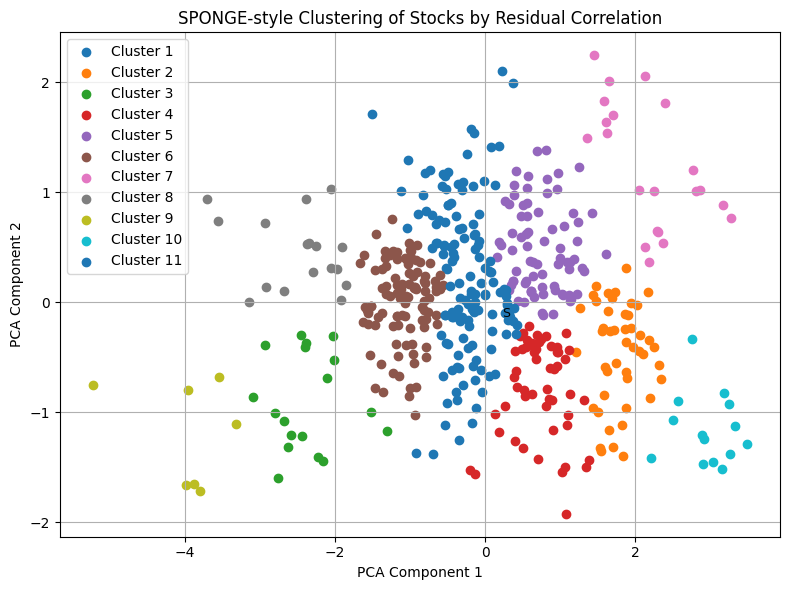

In [66]:
plt.figure(figsize=(8, 6))
plt.show
for i in range(n_clusters):
    plt.scatter(embedding[labels == i, 0], embedding[labels == i, 1], label=f'Cluster {i+1}')
for i, ticker in enumerate(ticker):
    plt.text(embedding[i, 0], embedding[i, 1], ticker, fontsize=9, ha='right')
plt.title("SPONGE-style Clustering of Stocks by Residual Correlation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

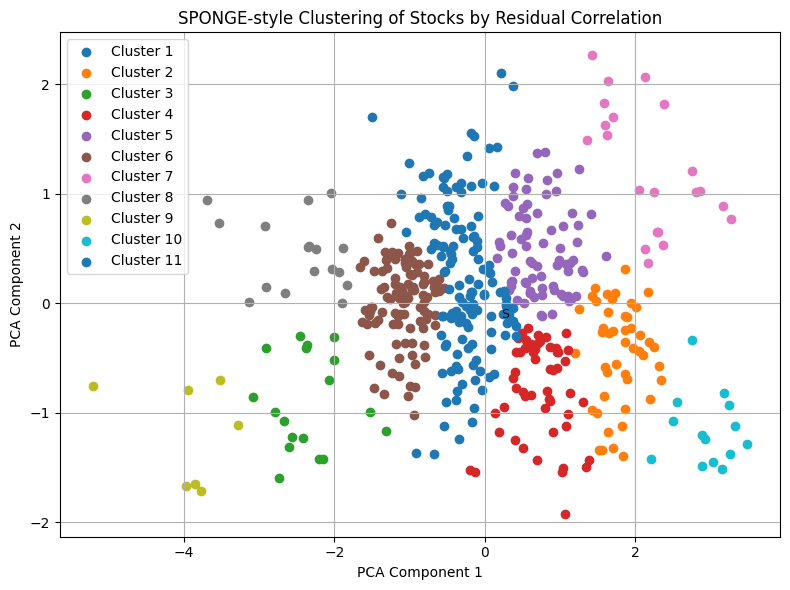

In [67]:
plt.figure(figsize=(8, 6))
plt.show
for i in range(n_clusters):
    plt.scatter(embedding_thresh[labels == i, 0], embedding_thresh[labels == i, 1], label=f'Cluster {i+1}')
for i, ticker in enumerate(ticker):
    plt.text(embedding_thresh[i, 0], embedding_thresh[i, 1], ticker, fontsize=9, ha='right')
plt.title("SPONGE-style Clustering of Stocks by Residual Correlation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_plot = pd.DataFrame({
    'PCA1': embedding[:, 0],
    'PCA2': embedding[:, 1],
    'Cluster': labels.astype(str),
    'Ticker': ticker
    'Industry': 
})

# 2) Plot with Plotly
fig = px.scatter(
    df_plot,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    hover_name='Ticker',
    title='Interactive SPONGE-style Clustering of Stocks',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'Name': 'Ticker'}
)

fig.update_traces(marker=dict(size=10, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Cluster')
fig.show()

In [82]:
df_plot

,PCA1,PCA2,Cluster,Ticker
0,0.332984,-0.135582,10,AAL
1,-0.131124,-0.706843,10,AAON
2,-2.048462,1.032852,7,AAPL
3,-1.325775,0.076909,5,ABAT
4,-1.185950,-0.379594,5,ABNB
...,...,...,...,...
495,-1.072054,-0.006253,5,ZEO
496,-0.571579,1.060264,0,ZG
497,2.897426,-1.475967,9,ZION
498,0.636824,0.234181,4,ZM


In [76]:
ticker

['AAL',
 'AAON',
 'AAPL',
 'ABAT',
 'ABNB',
 'ACDC',
 'ACTG',
 'ADBE',
 'ADI',
 'ADN',
 'ADP',
 'ADSK',
 'ADTN',
 'AEP',
 'AFRM',
 'AGFY',
 'AGNC',
 'AGNCL',
 'AGNCM',
 'AGNCN',
 'AGNCO',
 'AGNCP',
 'AIOT',
 'AKAM',
 'ALCE',
 'ALGN',
 'ALNY',
 'AMAT',
 'AMCX',
 'AMD',
 'AMGN',
 'AMOD',
 'AMPG',
 'AMPGW',
 'AMWD',
 'AMZN',
 'ANNA',
 'ANSS',
 'APA',
 'APEI',
 'APP',
 'APPS',
 'ARCC',
 'AREC',
 'ARKO',
 'ARLP',
 'ARTNA',
 'ASNS',
 'ASTS',
 'ATEX',
 'ATNI',
 'AVAV',
 'AVGO',
 'AVO',
 'AXON',
 'AXSM',
 'BBIO',
 'BCPC',
 'BIIB',
 'BKNG',
 'BKR',
 'BMRN',
 'BOKF',
 'BPMC',
 'BPOP',
 'BRFH',
 'BRID',
 'BRKR',
 'BRY',
 'BWEN',
 'BYND',
 'BYRN',
 'CACC',
 'CALM',
 'CART',
 'CASY',
 'CBSH',
 'CDNS',
 'CDW',
 'CDZI',
 'CDZIP',
 'CEG',
 'CELH',
 'CG',
 'CGABL',
 'CGNX',
 'CHDN',
 'CHRD',
 'CHRW',
 'CHTR',
 'CHX',
 'CINF',
 'CLFD',
 'CLMT',
 'CLNE',
 'CLRO',
 'CMCSA',
 'CME',
 'COCO',
 'COIN',
 'COKE',
 'COO',
 'COOP',
 'CORT',
 'COST',
 'CPB',
 'CPRT',
 'CRWD',
 'CSCO',
 'CSGP',
 'CSWI',
 'CSX',
 '